### 피쳐 추출 ==> 주성분 (PCA)
- 데이터의 피쳐(특성)들에서 주요 특성을 추출해내는 것
- 기존에 없던 데이터가 추출

In [1]:
# 모듈 로딩
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#### [기본 피쳐 활용 품종 분리]

In [9]:
irisData = load_iris()

In [10]:
# 꽃받침의 길이, 너비
data = irisData.data[:, :2]

In [11]:
# 품종
target = irisData.target

In [17]:
# column name
colname = irisData.feature_names[:2]

In [12]:
import pandas as pd

In [18]:
irisDF = pd.DataFrame(data, columns=colname)

In [20]:
irisDF['target'] = target

In [21]:
irisDF.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


* 데이터 분포 확인 ==> 산점도

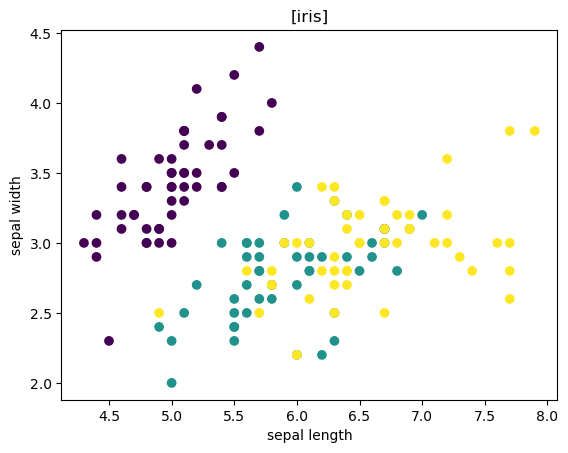

In [29]:
plt.scatter(irisDF['sepal length (cm)'], irisDF['sepal width (cm)'], c=target)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('[iris]')
# plt.legend({0:'setosa', 1:'versicolor', 2:'verginica'})
plt.show()

#### [주성분 추출]
- (1) 스케일링
- (2) 주성분 추출

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1. 스케일링

In [46]:
# iris 4개 피쳐 설정
irisDF4 = pd.DataFrame(irisData.data, columns=irisData.feature_names)

In [48]:
irisDF4['target'] = irisData.target

In [49]:
irisDF4.iloc[:, :-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
irisDF.iloc[:, :-1]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [50]:
ss = StandardScaler()
ss.fit(irisDF4.iloc[:, :-1])

StandardScaler()

In [51]:
scaled_data = ss.transform(irisDF4.iloc[:, :-1])

2. 주성분 추출

In [63]:
# 피쳐 4개 => 3개만 추출
pca = PCA(n_components=3)

In [64]:
pca.fit(scaled_data)

PCA(n_components=3)

- 주성분 추출 속성 확인

In [65]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274]])

In [66]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [67]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

- 주성분 변환

In [68]:
pca_data = pca.transform(scaled_data)

In [69]:
pca_data

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557],
       [-2.1663101 ,  1.04369065, -0.2686811 ],
       [-2.32613087,  0.13307834,  0.09375924],
       [-2.2184509 , -0.72867617, -0.23091124],
       [-2.6331007 , -0.96150673,  0.18079608],
       [-2.1987406 ,  1.86005711, -0.472901  ],
       [-2.26221453,  2.68628449,  0.03052661],
       [-2.2075877 ,  1.48360936, -0.00534409],
       [-2.19034951,  0.48883832, -0.04421532],
       [-1.898572  ,  1.40501879, -0.37434327],
       [-2.34336905,  1.12784938,  0.13263047],
       [-1.914323  ,  0.40885571, -0.421

- 3개의 주성분으로 3가지 품종 분류

In [70]:
pca_data[:, 0], pca_data[:, 1]

(array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
        -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
        -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
        -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
        -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
        -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
        -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
        -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
        -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
        -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
         1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
         0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
        -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
         0.87540719,  0.35025167,  0.15881005,  1.2

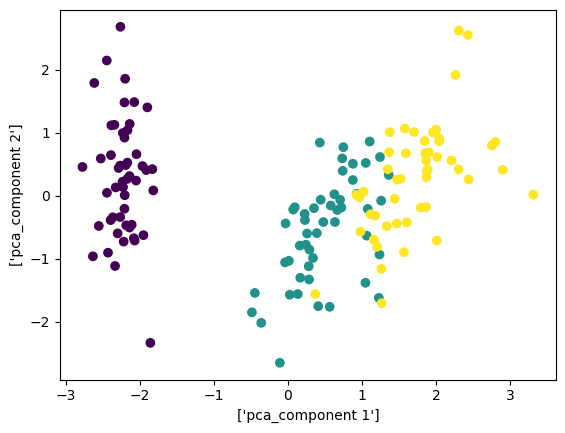

In [71]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=irisDF4.target)
plt.xlabel(['pca_component 1'])
plt.ylabel(['pca_component 2'])
plt.show()